## Added conditional logic to decide which node to call. The sample here is a joke generator on physics/math/chemistry based on the subject user provides. A conditional logic decide which node is to be called based on right subject.

In [18]:
from typing import TypedDict, Literal
from langgraph.graph import START,END,StateGraph
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from IPython.display import Image, display
from pydantic import BaseModel, Field

load_dotenv()

True

In [19]:
gpt_llm= ChatOpenAI(model="gpt-4o-mini")


## Using pydantic to decide the subject type

In [20]:
class Subject(BaseModel):
    subject_type: Literal["Physics","Maths","Chemistry"] = Field(description="This is to define the subject of the topic")

## Using structured output to get the pydantic output as desired

In [21]:
structured_model=gpt_llm.with_structured_output(Subject)

## Joke state

In [22]:
class JokeExpert(TypedDict):
    topic: str
    final_joke: str
    numoflines: int
    subject_type: str

In [23]:
def physics_joke(state: JokeExpert)-> JokeExpert:
    topic= state['topic']
    numoflines= state['numoflines']
    prompt=f"You are a physics joke comedian, your end goal is to make a joke of the topic: \n {topic} in {numoflines} lines."
    physics_joke=gpt_llm.invoke(prompt)

    return {"final_joke":physics_joke}



In [24]:
def math_joke(state: JokeExpert)-> JokeExpert:
    topic= state['topic']
    numoflines= state['numoflines']
    prompt=f"You are a math joke comedian, your end goal is to make a joke of the topic: \n {topic} in {numoflines} lines."
    math_joke=gpt_llm.invoke(prompt)

    return {"final_joke":math_joke}



In [25]:
def chemistry_joke(state: JokeExpert)-> JokeExpert:
    topic= state['topic']
    numoflines= state['numoflines']
    prompt=f"You are a chemistry joke comedian, your end goal is to make a joke of the topic: \n {topic} in {numoflines} lines."
    chemistry_joke=gpt_llm.invoke(prompt)

    return {"final_joke":chemistry_joke}



In [26]:
def subject_checker(state: JokeExpert) -> JokeExpert:
    topic=state['topic']
    prompt=f"You are subject matter checker, you should be able to classify the topic given by the users: {topic}"
    output=structured_model.invoke(prompt)
    return {"subject_type":output}

## Joke condition to execute the desired joke node

In [27]:
def subject_condition(state: JokeExpert) -> Literal["physics_joke","math_joke","chemistry_joke"]:
    if state["subject_type"]=="Physics":
        return "physics_joke"
    elif state["subject_type"]=="Maths":
        return "math_joke"
    else:
        return "chemistry_joke"

In [28]:
graph=StateGraph(JokeExpert)

graph.add_node("physics_joke",physics_joke)
graph.add_node("math_joke",math_joke)
graph.add_node("chemistry_joke",chemistry_joke)
graph.add_node("subject_checker",subject_checker)

graph.add_edge(START, "subject_checker")
graph.add_conditional_edges("subject_checker",subject_condition)
graph.add_edge("physics_joke", END)
graph.add_edge("math_joke", END)
graph.add_edge("physics_joke", END)

workflow=graph.compile()

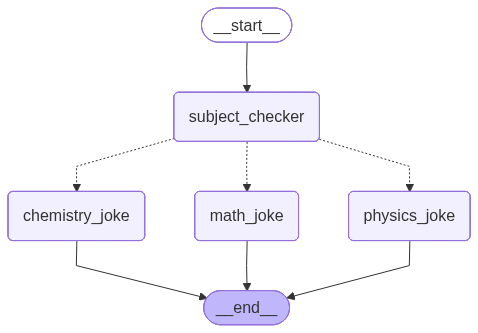

In [29]:
display(Image(workflow.get_graph().draw_mermaid_png()))

In [30]:
final_state=workflow.invoke({"topic":"Algebra","numoflines":5})

In [31]:
final_state

{'topic': 'Algebra',
 'final_joke': AIMessage(content="Why did the chemist break up with algebra?  \nBecause he couldn't find his x!  \nHe thought their relationship was stable,  \nBut she kept changing all the variables,  \nAnd he just wanted to focus on his reactions!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 33, 'total_tokens': 79, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CPoVKyWTC3DKQgUEqvDvuaFY8hxwZ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--7cb65577-e939-4536-95b9-b5d36caefa78-0', usage_metadata={'input_tokens': 33, 'output_tokens': 46, 'total_tokens': 79, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'out

In [32]:
final_state=workflow.invoke({"topic":"Oxygen","numoflines":5})

In [33]:
final_state

{'topic': 'Oxygen',
 'final_joke': AIMessage(content='Why did the oxygen molecule break up with sodium?  \nBecause it found out sodium was too salty!  \nOxygen wanted someone who’d lift it up, not make it feel down.  \nSo it went dancing with hydrogen, and they formed a bond!  \nNow they’re always together — just a little too reactive for my taste!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 67, 'prompt_tokens': 33, 'total_tokens': 100, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CPoVN1TIgLvKArcKcYDohTBkmVRNW', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--7fd1cb98-ec27-4420-99d8-c6ebde4d9e75-0', usage_metadata={'input_tokens': 33, 'output_tokens': 6

In [34]:
final_state=workflow.invoke({"topic":"Alkaline","numoflines":5})
final_state

{'topic': 'Alkaline',
 'final_joke': AIMessage(content="Why did the alkaline solution break up with the acidic solution?  \nBecause it found the relationship too reactive!  \nThey just couldn't find a neutral ground.  \nNow it's bubbling with excitement, feeling so high on pH!  \nTalk about a chemistry of happiness!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 52, 'prompt_tokens': 35, 'total_tokens': 87, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CPoVW6S67VmuwvJC1v5t8DyoU1eb6', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--e397789a-9f6f-41f7-acc2-1191607beaf9-0', usage_metadata={'input_tokens': 35, 'output_tokens': 52, 'total_tokens': 87, 'input_toke